In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import ast
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore") # Ignoring warnings

In [17]:
csv = pd.read_csv('global_traffic_accidents.csv')
accidents_df = pd.DataFrame(csv)
accidents_df

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving
...,...,...,...,...,...,...,...,...,...,...,...
9995,2d26c7e2,2023-01-10,18:41,"Paris, France",-41.344055,109.335620,Storm,Wet,3,10,Distracted Driving
9996,4d236cfd,2023-04-04,16:48,"São Paulo, Brazil",-60.765148,-10.432225,Storm,Dry,3,9,Weather Conditions
9997,1d32722f,2024-09-30,14:43,"Beijing, China",-11.161278,-72.164379,Snow,Under Construction,2,3,Weather Conditions
9998,64722572,2024-10-27,18:34,"Sydney, Australia",-17.153524,20.803006,Storm,Under Construction,4,3,Drunk Driving


In [18]:
accidents_df.describe()

,Latitude,Longitude,Vehicles Involved,Casualties
count,10000.000000,10000.000000,10000.000000,10000.00000
mean,-0.543557,0.338573,2.999100,4.98820
std,51.917928,103.379168,1.408935,3.13015
min,-89.985688,-179.961984,1.000000,0.00000
25%,-45.426619,-88.231733,2.000000,2.00000
50%,-1.080556,-0.682727,3.000000,5.00000
75%,44.137309,89.973059,4.000000,8.00000
max,89.990081,179.981695,5.000000,10.00000


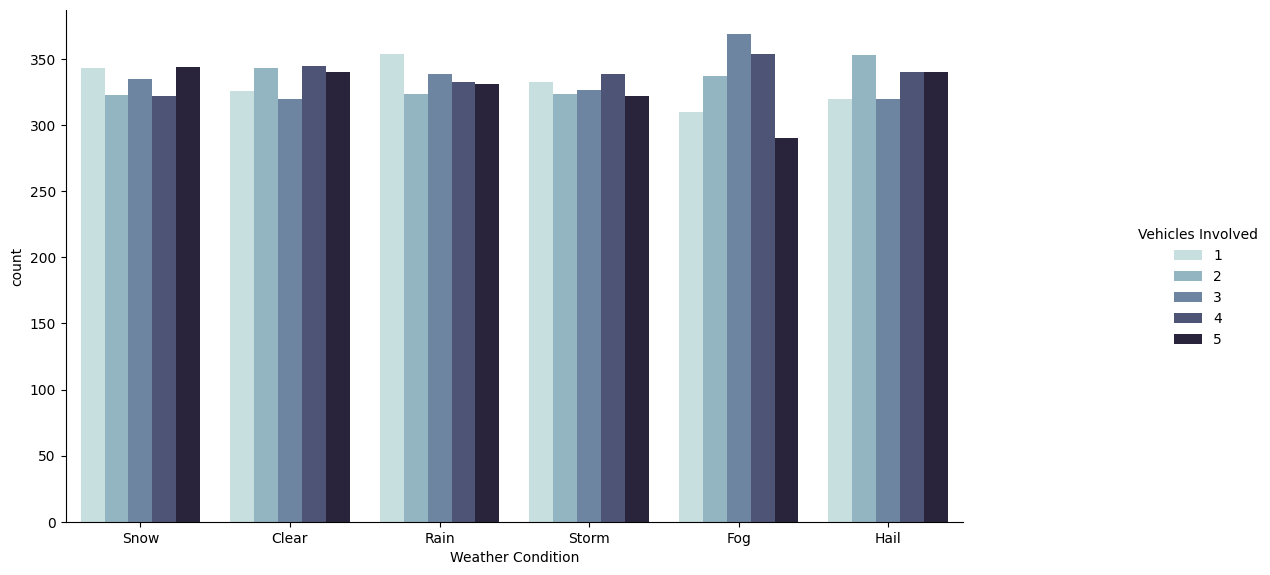

In [19]:
# Using Seaborn to plot
plot = sns.catplot(accidents_df, x='Weather Condition', hue="Vehicles Involved", kind='count', palette="ch:start=.2,rot=-.3")
plot.figure.set_size_inches(14,6)
plot.set_titles("Count of accidents ")

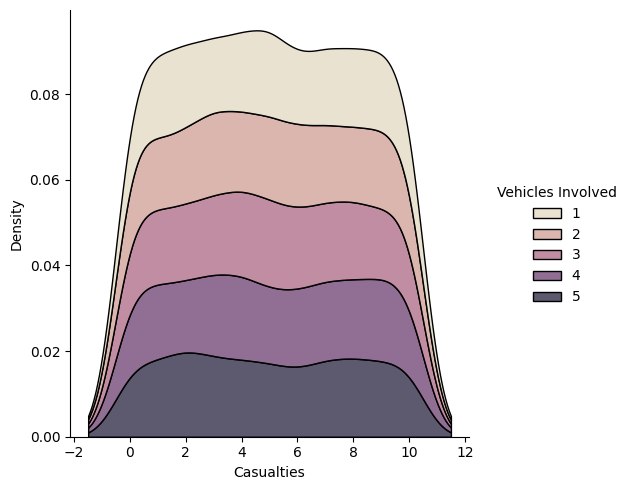

In [20]:
# Using Seaborn to plot
plot = sns.displot(accidents_df, x= "Casualties", hue="Vehicles Involved", kind="kde", multiple="stack", palette="ch:s=-.2,r=.6")
plt.show()

In [21]:
# Tranformated 'Date' column to date Dtype
accidents_df['Date']= pd.to_datetime(accidents_df['Date'])
accidents_df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving


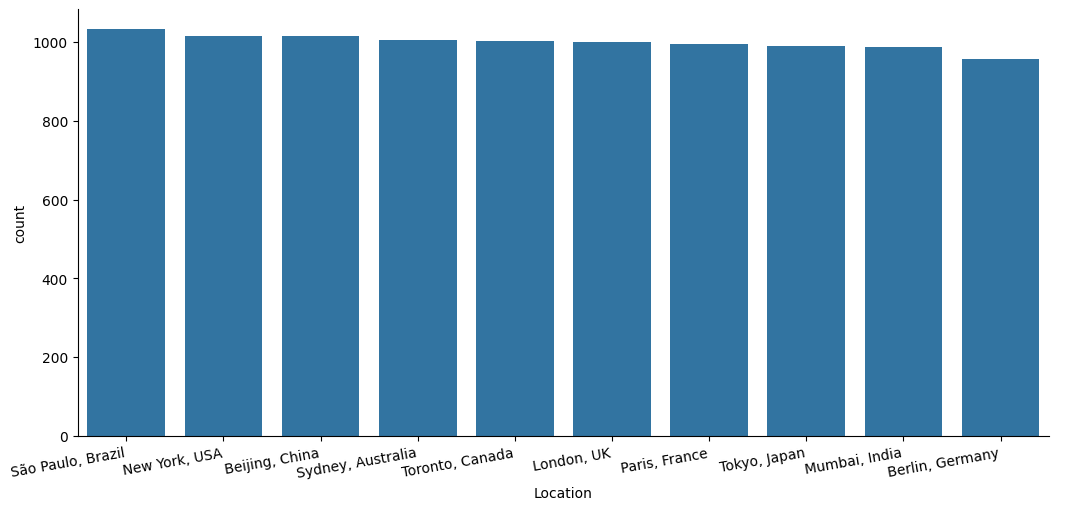

In [24]:
# Using Seaborn to plot
plot = sns.catplot(accidents_df,
                   x='Location',
                   kind='count',
                   order=accidents_df.Location.value_counts().index)
plot.figure.set_size_inches(12,5)
plot.set_xticklabels(rotation=10, ha='right')
plt.show()

In [25]:
# Creating a dataframe with 'Location', 'Latitude' and 'Longitude' columns where 'Location' = 'São Paulo, Brazil'
sp_df = accidents_df.loc[accidents_df['Location'] == 'São Paulo, Brazil', ['Location', 'Latitude', 'Longitude']].reset_index(drop=True)
sp_df

,Location,Latitude,Longitude
0,"São Paulo, Brazil",-37.798317,-32.244242
1,"São Paulo, Brazil",-39.332739,0.991049
2,"São Paulo, Brazil",51.568285,-22.209768
3,"São Paulo, Brazil",0.520167,-170.052320
4,"São Paulo, Brazil",-37.075082,-3.632071
...,...,...,...
1027,"São Paulo, Brazil",-46.378740,4.294878
1028,"São Paulo, Brazil",83.481857,-83.701844
1029,"São Paulo, Brazil",-37.784977,-123.903311
1030,"São Paulo, Brazil",17.673898,-53.073675


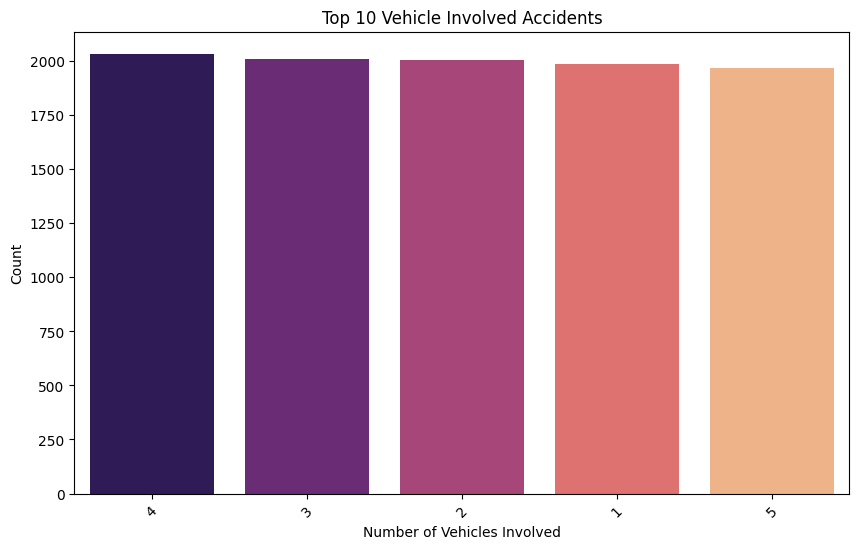

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Vehicles Involved"], palette="magma", order=df["Vehicles Involved"].value_counts().index[:10])
plt.title("Top 10 Vehicle Involved Accidents")
plt.xlabel("Number of Vehicles Involved")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

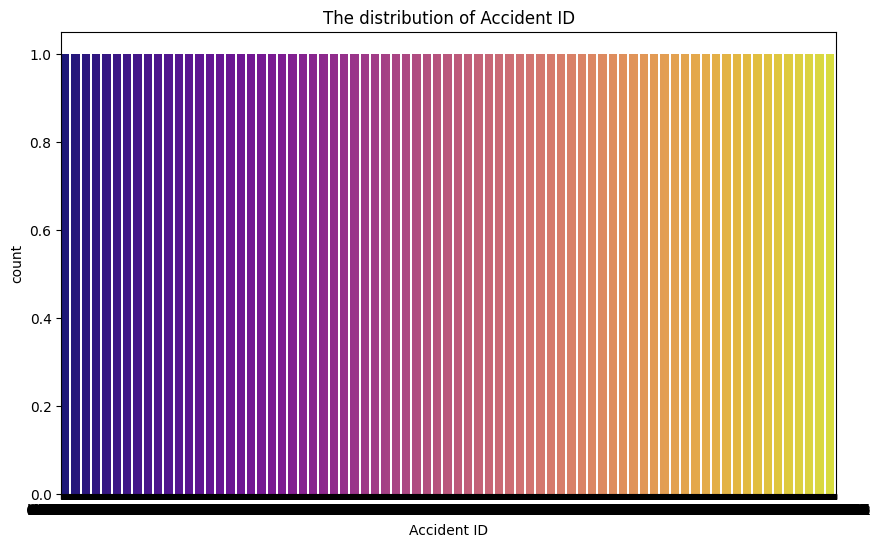

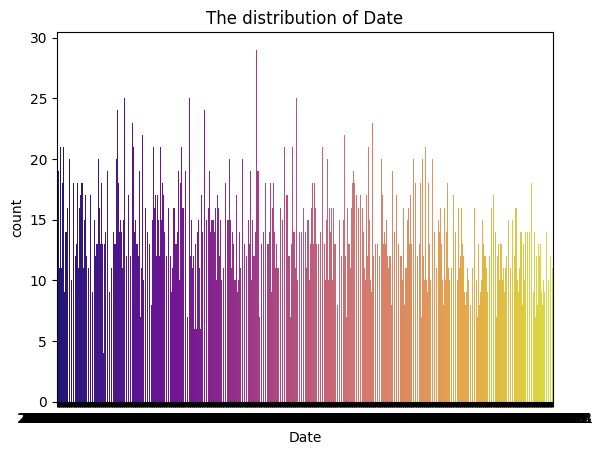

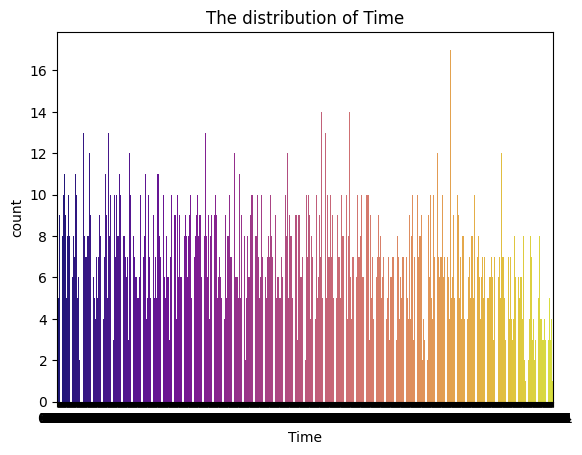

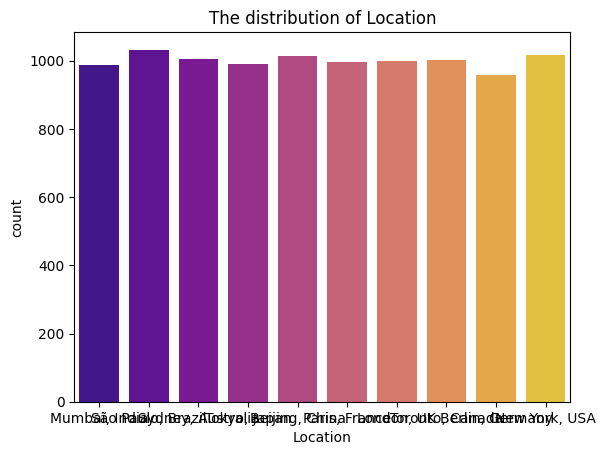

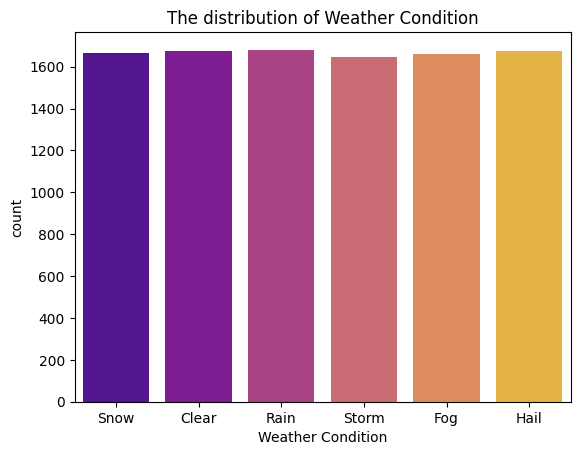

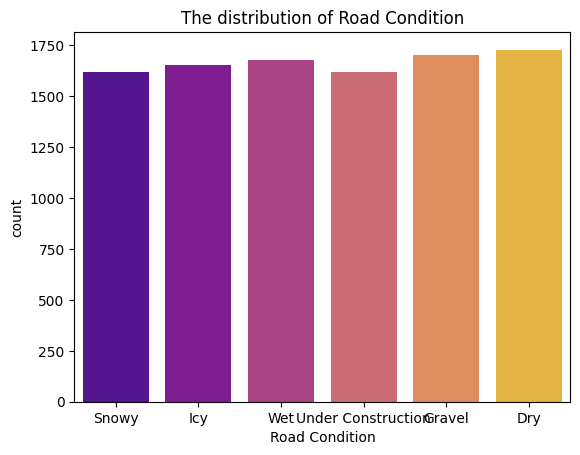

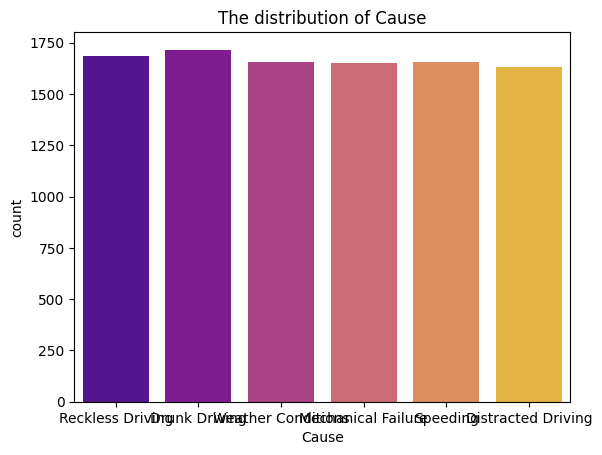

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [36]:
df = pd.read_csv('global_traffic_accidents.csv')

In [37]:
df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving


In [38]:
df.shape

(10000, 11)

In [39]:
df.isnull().sum()

,0
Accident ID,0
Date,0
Time,0
Location,0
Latitude,0
Longitude,0
Weather Condition,0
Road Condition,0
Vehicles Involved,0
Casualties,0


In [40]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [41]:
df.describe()

,Date,Latitude,Longitude,Vehicles Involved,Casualties
count,10000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2024-01-01 12:40:53.760000256,-0.543557,0.338573,2.999100,4.98820
min,2023-01-01 00:00:00,-89.985688,-179.961984,1.000000,0.00000
25%,2023-06-30 00:00:00,-45.426619,-88.231733,2.000000,2.00000
50%,2024-01-01 00:00:00,-1.080556,-0.682727,3.000000,5.00000
75%,2024-07-03 00:00:00,44.137309,89.973059,4.000000,8.00000
max,2024-12-31 00:00:00,89.990081,179.981695,5.000000,10.00000
std,NaN,51.917928,103.379168,1.408935,3.13015


In [42]:
df['Weather Condition'].unique()
df['Road Condition'].unique()
df['Cause'].unique()

array(['Reckless Driving', 'Drunk Driving', 'Weather Conditions',
       'Mechanical Failure', 'Speeding', 'Distracted Driving'],
      dtype=object)

In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

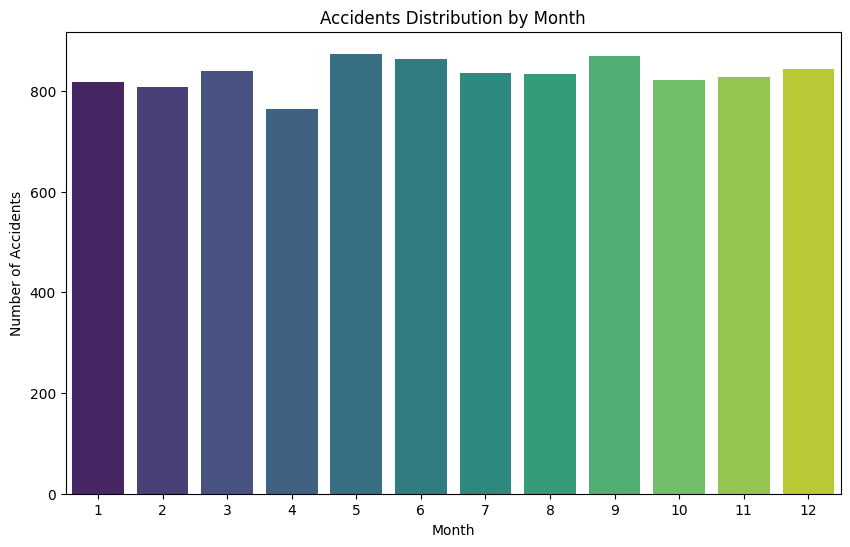

In [46]:
# Plotting accidents over time (by month)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', palette='viridis')
plt.title('Accidents Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

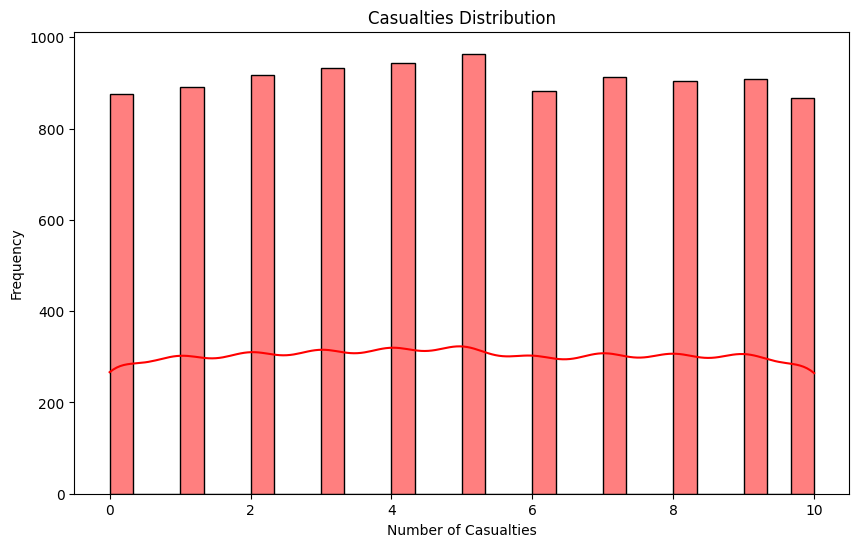

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Casualties'], kde=True, color='red', bins=30)
plt.title('Casualties Distribution')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.show()

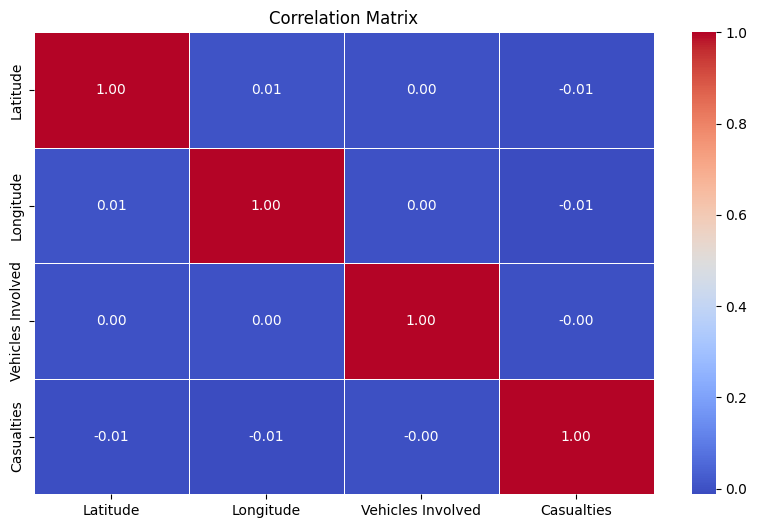

In [48]:
# Step to define numeric_df
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now create the correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

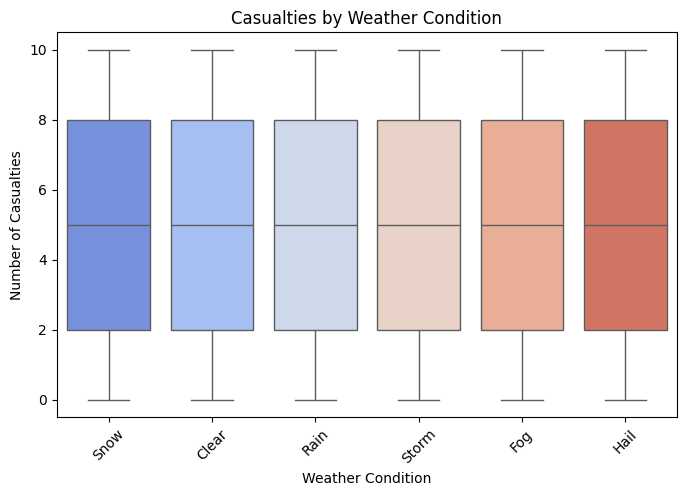

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Weather Condition', y='Casualties', palette='coolwarm')
plt.title('Casualties by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.show()